# Testing RTE in synthesis mode

In [1]:
# Loading libraries
import matplotlib.pyplot as plt
import numpy as np

from milos import milos
cmd = '../milos/lib/./milos.x'
from astropy.convolution import convolve

### create input file for MILOS

We will generate 5 different models for testing.

In [160]:
model = np.array([2000.,30.,30.,8.5, 0.070, 0.08, 0., 0.2, 0.8 ])
model_big = np.zeros((100,100,9))
for i in range(100):
    for j in range(100):
        model_big[i,j,:] = [0.,30.,30.,8.5, 0.070, 0.08, 0., 0.2, 0.8 ]
        model_big[i,j,0] = i*25
        model_big[i,j,6] = j/100*8-4
# B, gamma, phi, eta0, landadopp,aa, vlos, S0, S1
wave_axis = 6173.341000 + np.array([-140,-70,70,140])/1000.#]np.linspace(6173.3354-0.4,6173.3354+0.4,30)
#wave_axis = np.linspace(6173.341000-0.2,6173.341000+0.2,400, endpoint=True)
model_big = np.reshape(model_big,(100*100,9))

In [161]:
options = [0,0,0,0,0,0,0,0,0]
options[0] = len(wave_axis) #NLAMBDA wave axis dimension
options[1] = 30 #MAX_ITER max number of iterations
options[2] = 1 #CLASSICAL_ESTIMATES [0,1,2] 0=RTE, 1= CE+RTE, 2= CE
options[3] = 2 #RFS [0,1,2] 0.-> Inversion, 1-> synthesis 2-> RFS
options_psf = [0,0,0,0,0,0,0,0,0]
options_psf[0] = len(wave_axis) #NLAMBDA wave axis dimension
options_psf[1] = 30 #MAX_ITER max number of iterations
options_psf[2] = 1 #CLASSICAL_ESTIMATES [0,1,2] 0=RTE, 1= CE+RTE, 2= CE
options_psf[3] = 2 #RFS [0,1,2] 0.-> Inversion, 1-> synthesis 2-> RFS
options_psf[4] = 105 #FWHM = atof(argv[5]);
options_psf[5] = int((wave_axis[1] - wave_axis[0])*1000.)#70 ##DELTA = atof(argv[6]);
options_psf[6] = len(wave_axis)  #NMUESTRAS_G = atoi(argv[7]);


CMILOS SINGLE MODEL SYN and SYN + PSF

Note that we are using cmilos as well

In [162]:
out_pmilos = milos.phi_rte(model, wave_axis, rte_mode = 'SYN')
#out_cmilos = milos.phi_rte(model, wave_axis, rte_mode = 'SYN', cmd = cmd)

No input options. Setting for PHI only.
Using defaults weights.
Using defaults init model.
RTE_MODE  SYN
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [ 4 30  1  1  0  0  0  0  0]
models (milos.pyx):  1
------ flattened:  (9,)
  ---- >>>>> Finishing.... 
profiles to synthesize = 1


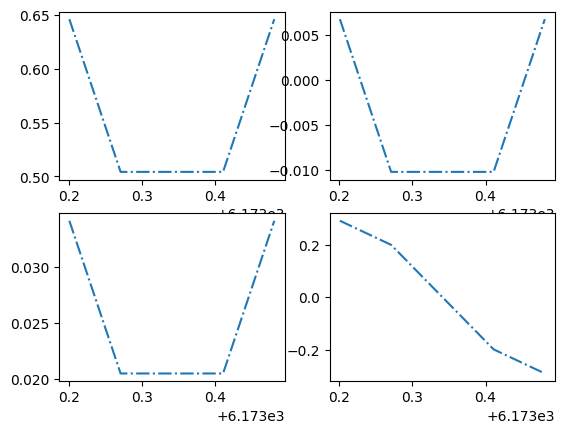

In [163]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,out_pmilos[0,:],'-.')
ax[0,1].plot(wave_axis,out_pmilos[1,:],'-.')
ax[1,0].plot(wave_axis,out_pmilos[2,:],'-.')
ax[1,1].plot(wave_axis,out_pmilos[3,:],'-.')
#ax[0,0].plot(wave_axis,out_cmilos[0,:],'*')
#ax[0,1].plot(wave_axis,out_cmilos[1,:],'*')
#ax[1,0].plot(wave_axis,out_cmilos[2,:],'*')
#ax[1,1].plot(wave_axis,out_cmilos[3,:],'*')
plt.show()

In [164]:
out_pmilos_big = milos.phi_rte(model_big, wave_axis, rte_mode = 'SYN')
#out_cmilos_big = milos.phi_rte(model_big, wave_axis, rte_mode = 'SYN', cmd = cmd)

No input options. Setting for PHI only.
Using defaults weights.
Using defaults init model.
RTE_MODE  SYN
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [ 4 30  1  1  0  0  0  0  0]
models (milos.pyx):  10000
------ flattened:  (90000,)
profiles to synthesize = 10000
  ---- >>>>> Finishing.... 


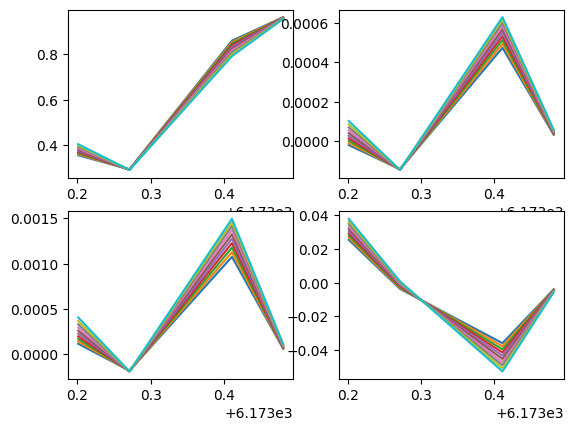

In [165]:
fig, ax = plt.subplots(nrows=2, ncols=2)
out_pmilos_bigp = np.reshape(out_pmilos_big,(100,100,4,4))
for i in range(10):
    ax[0,0].plot(wave_axis,out_pmilos_bigp[10,i,0,:])
    ax[0,1].plot(wave_axis,out_pmilos_bigp[10,i,1,:])
    ax[1,0].plot(wave_axis,out_pmilos_bigp[10,i,2,:])
    ax[1,1].plot(wave_axis,out_pmilos_bigp[10,i,3,:])
    #ax[0,0].plot(wave_axis,out_cmilos_big[i,0,:],'.')
    #ax[0,1].plot(wave_axis,out_cmilos_big[i,1,:],'.')
    #ax[1,0].plot(wave_axis,out_cmilos_big[i,2,:],'.')
    #ax[1,1].plot(wave_axis,out_cmilos_big[i,3,:],'.')
plt.show()


In [166]:
def cp(d):
    return d[:,3,0]+d[:,3,1]-d[:,3,2]-d[:,3,3]

In [167]:
cc = cp(out_pmilos_big)

In [168]:
model_big = np.reshape(model_big,(100,100,9))

In [169]:
0.7*2500

1750.0

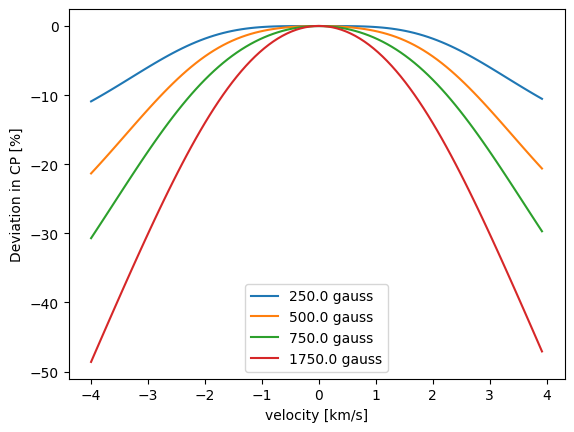

In [171]:
ccc=np.reshape(cc,(100,100))

plt.plot(model_big[0,:,6],(ccc[10,:]-ccc[10,49])*100,label=str(10/100*2500)+' gauss')
plt.plot(model_big[0,:,6],(ccc[20,:]-ccc[20,49])*100,label=str(20/100*2500)+' gauss')
plt.plot(model_big[0,:,6],(ccc[30,:]-ccc[30,49])*100,label=str(30/100*2500)+' gauss')
plt.plot(model_big[0,:,6],(ccc[70,:]-ccc[70,49])*100,label=str(70/100*2500)+' gauss')
plt.legend()
plt.xlabel('velocity [km/s]')
plt.ylabel('Deviation in CP [%]')
plt.show()



In [8]:
def gaussian_psf(fwhm,n_samples,delta):

	sigma = fwhm / (2*np.sqrt(2*np.log(2)))
	alfa = 1   /  (sigma*np.sqrt(2*np.pi))
	mitad_nmuestras_G = n_samples//2 + 1

	res = np.zeros((n_samples))

	for i in range(n_samples):
		aux = -(mitad_nmuestras_G*delta)+((i+1)*delta)
		res[i] = alfa*np.exp(-( 	(aux*aux)/((sigma*sigma)*2) ) )
		res[i] = res[i]*delta

	return  res/np.sum(res)


In [9]:
psf = gaussian_psf(options_psf[4]/1000.,options_psf[6]+1,options_psf[5]/1000.)
plt.plot(psf)

In [10]:
out_pmilos_psf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+PSF',options=options_psf)

Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+PSF
PSF in synthesis version activated
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [ 30  30   1   1 105  27  30   0   0]
models (milos.pyx):  1
------ flattened:  (9,)
  ---- >>>>> Finishing.... 
profiles to synthesize = 1


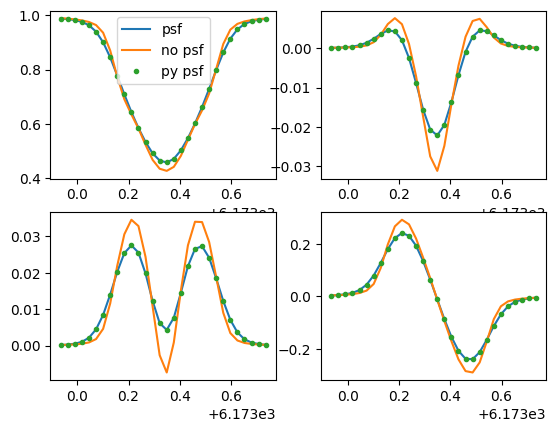

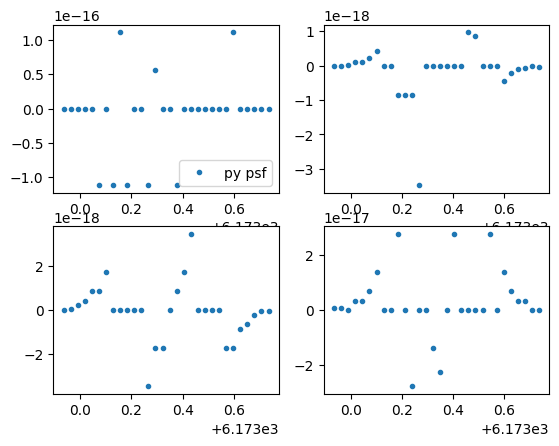

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,out_pmilos_psf[0,:],label='psf')
ax[0,1].plot(wave_axis,out_pmilos_psf[1,:])
ax[1,0].plot(wave_axis,out_pmilos_psf[2,:])
ax[1,1].plot(wave_axis,out_pmilos_psf[3,:])
ax[0,0].plot(wave_axis,out_pmilos[0,:],label='no psf')
ax[0,1].plot(wave_axis,out_pmilos[1,:])
ax[1,0].plot(wave_axis,out_pmilos[2,:])
ax[1,1].plot(wave_axis,out_pmilos[3,:])
SI = out_pmilos[0,0] - out_pmilos[0,:]
ax[0,0].plot(wave_axis, out_pmilos[0,0] - convolve(SI,psf),'.',label='py psf')
ax[0,1].plot(wave_axis,convolve(out_pmilos[1,:],psf),'.')
ax[1,0].plot(wave_axis,convolve(out_pmilos[2,:],psf),'.')
ax[1,1].plot(wave_axis,convolve(out_pmilos[3,:],psf),'.')

ax[0,0].legend()
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=2)
SI = out_pmilos[0,0] - out_pmilos[0,:]
ax[0,0].plot(wave_axis, (out_pmilos[0,0] - convolve(SI,psf))-out_pmilos_psf[0,:],'.',label='py psf')
ax[0,1].plot(wave_axis,(convolve(out_pmilos[1,:],psf) - out_pmilos_psf[1,:]) ,'.')
ax[1,0].plot(wave_axis,(convolve(out_pmilos[2,:],psf) - out_pmilos_psf[2,:]) ,'.')
ax[1,1].plot(wave_axis,(convolve(out_pmilos[3,:],psf) - out_pmilos_psf[3,:]) ,'.')

ax[0,0].legend()
plt.show()

In [12]:
out_cmilos_psf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+PSF',options=options_psf, cmd = cmd)

Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+PSF
PSF in synthesis version activated
Using CMILOS ASCII version
  ---- >>>>> Synthesizing data.... 
../milos/lib/./milos.x 30 30 1 1 105 27 30 ./dummy_in.txt > ./dummy_out.txt
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


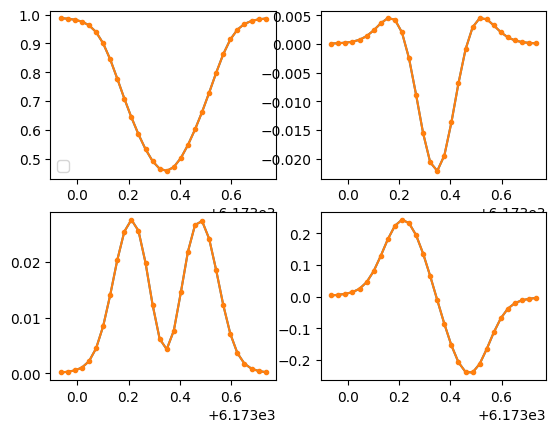

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,out_pmilos_psf[0,:]-out_cmilos_psf[0,:],'.-')
ax[0,1].plot(wave_axis,out_pmilos_psf[1,:]-out_cmilos_psf[1,:],'.-')
ax[1,0].plot(wave_axis,out_pmilos_psf[2,:]-out_cmilos_psf[2,:],'.-')
ax[1,1].plot(wave_axis,out_pmilos_psf[3,:]-out_cmilos_psf[3,:],'.-')
plt.show()
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].plot(wave_axis,out_cmilos_psf[0,:],'-')
ax[0,1].plot(wave_axis,out_cmilos_psf[1,:],'-')
ax[1,0].plot(wave_axis,out_cmilos_psf[2,:],'-')
ax[1,1].plot(wave_axis,out_cmilos_psf[3,:],'-')
ax[0,0].plot(wave_axis,out_pmilos_psf[0,:],'.-')
ax[0,1].plot(wave_axis,out_pmilos_psf[1,:],'.-')
ax[1,0].plot(wave_axis,out_pmilos_psf[2,:],'.-')
ax[1,1].plot(wave_axis,out_pmilos_psf[3,:],'.-')

ax[0,0].legend()
plt.show()

CMILOS SINGLE MODEL RFS and RFS + PSF

In [14]:
out_cmilos_rf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+RFS',options=options, cmd = cmd)
out_cmilos_rf_psf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+PSF+RFS',options=options_psf, cmd = cmd)

Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+RFS
Using CMILOS ASCII version
  ---- >>>>> Synthesizing data.... 
../milos/lib/./milos.x 30 30 1 2 0 0 0 ./dummy_in.txt > ./dummy_out.txt
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 
Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+PSF+RFS
PSF in synthesis version activated
Using CMILOS ASCII version
  ---- >>>>> Synthesizing data.... 
../milos/lib/./milos.x 30 30 1 2 105 27 30 ./dummy_in.txt > ./dummy_out.txt
0
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 


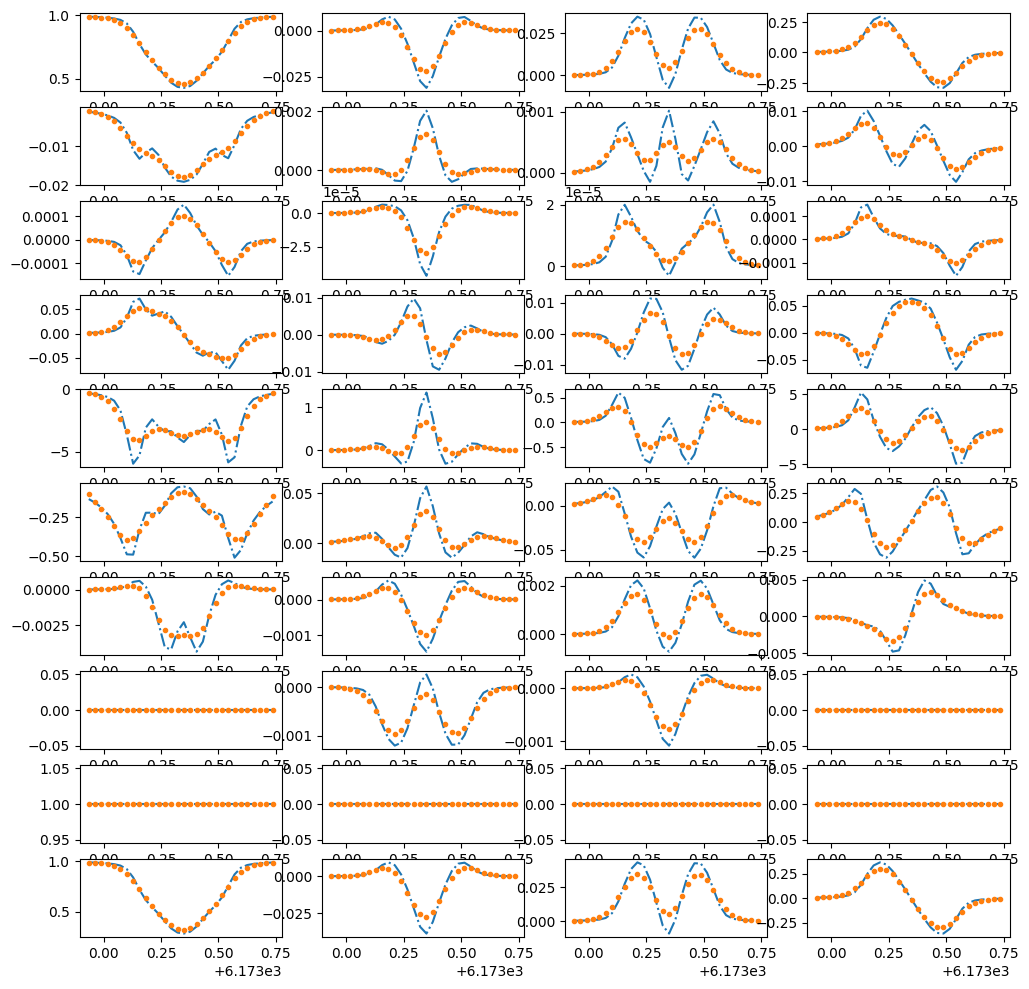

In [15]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
for i in range(10):
    ax[i,0].plot(wave_axis,out_cmilos_rf[i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf[i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf[i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf[i,3,:],'-.')
    ax[i,0].plot(wave_axis,out_cmilos_rf_psf[i,0,:],'.')
    ax[i,1].plot(wave_axis,out_cmilos_rf_psf[i,1,:],'.')
    ax[i,2].plot(wave_axis,out_cmilos_rf_psf[i,2,:],'.')
    ax[i,3].plot(wave_axis,out_cmilos_rf_psf[i,3,:],'.')


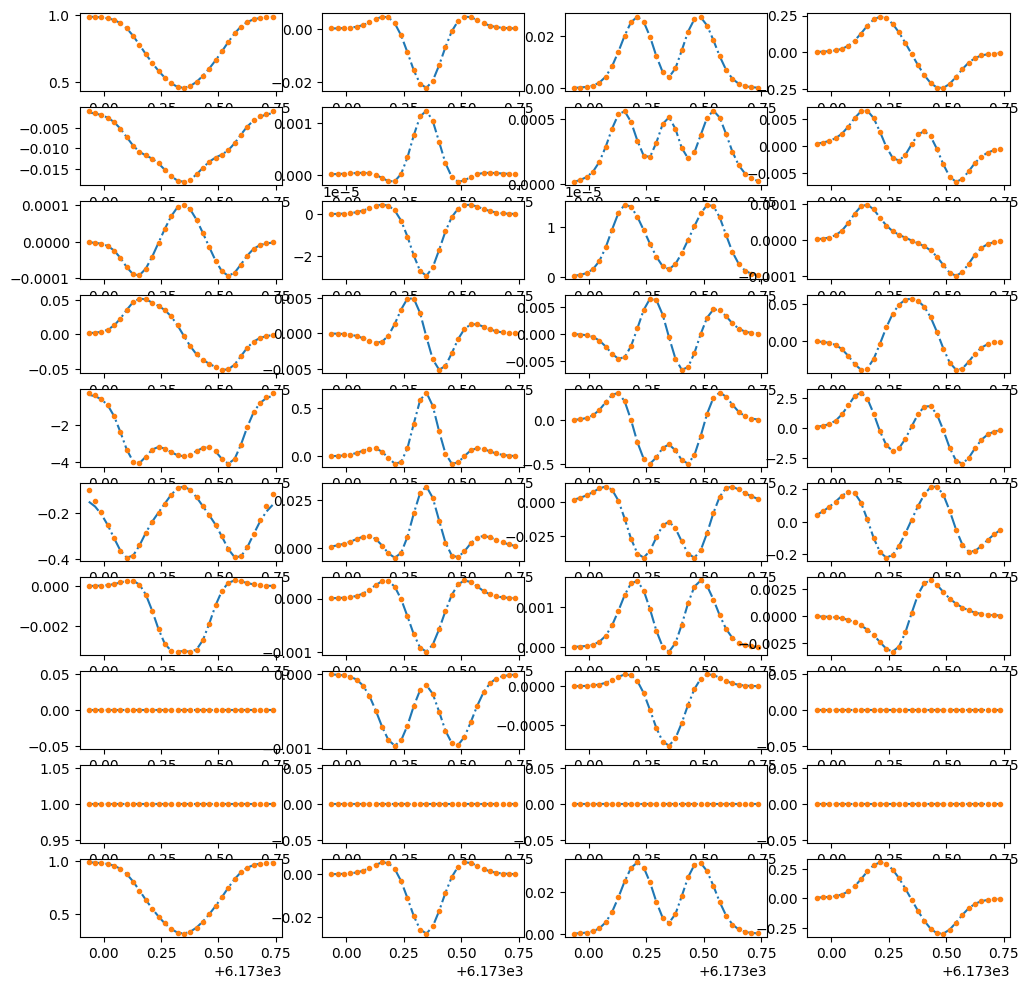

In [16]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
for i in range(10):
    ax[i,0].plot(wave_axis,out_cmilos_rf[i,0,0] - convolve(out_cmilos_rf[i,0,0] - out_cmilos_rf[i,0,:],psf),'-.')
    ax[i,1].plot(wave_axis,convolve(out_cmilos_rf[i,1,:],psf),'-.')
    ax[i,2].plot(wave_axis,convolve(out_cmilos_rf[i,2,:],psf),'-.')
    ax[i,3].plot(wave_axis,convolve(out_cmilos_rf[i,3,:],psf),'-.')
    ax[i,0].plot(wave_axis,out_cmilos_rf_psf[i,0,:],'.')
    ax[i,1].plot(wave_axis,out_cmilos_rf_psf[i,1,:],'.')
    ax[i,2].plot(wave_axis,out_cmilos_rf_psf[i,2,:],'.')
    ax[i,3].plot(wave_axis,out_cmilos_rf_psf[i,3,:],'.')

plt.show()


In [17]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
for i in range(10):
    ax[i,0].plot(wave_axis,out_cmilos_rf_psf[i,0,:] - (out_cmilos_rf[i,0,0] - convolve(out_cmilos_rf[i,0,0] - out_cmilos_rf[i,0,:],psf)),'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf_psf[i,1,:] - convolve(out_cmilos_rf[i,1,:],psf),'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf_psf[i,2,:] - convolve(out_cmilos_rf[i,2,:],psf),'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf_psf[i,3,:] - convolve(out_cmilos_rf[i,3,:],psf),'-.')

plt.show()


PMILOS VS CMILOS SINGLE MODEL RFS and RFS 

In [18]:
out_pmilos_rf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+RFS',options=options)
out_cmilos_rf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+RFS',options=options, cmd=cmd)

Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+RFS
Using PMILOS version
  ---- >>>>> Synthesizing data.... 
Options [in pymilos]:  [30 30  1  2  0  0  0  0  0]
models (milos.pyx):  1
------ flattened:  (9,)
  ---- >>>>> Finishing.... 
Using defaults weights.
Using defaults init model.
RTE_MODE  SYN+RFS
Using CMILOS ASCII version
profiles to synthesize = 1
  ---- >>>>> Synthesizing data.... 
../milos/lib/./milos.x 30 30 1 2 0 0 0 ./dummy_in.txt > ./dummy_out.txt
13492m
  ---- >>>>> Finishing.... 
  ---- >>>>> Reading results.... 


/bin/sh: line 1: 61185 Abort trap: 6           ../milos/lib/./milos.x 30 30 1 2 0 0 0 ./dummy_in.txt > ./dummy_out.txt


In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[i,0,:],'.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[i,1,:],'.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[i,2,:],'.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[i,3,:],'.')
    ax[i,0].plot(wave_axis,out_cmilos_rf[i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf[i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf[i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf[i,3,:],'-.')
plt.show()


In [ ]:
out_pmilos_rf = milos.phi_rte(model_big, wave_axis, rte_mode = 'SYN+RFS',options=options)
out_cmilos_rf = milos.phi_rte(model_big, wave_axis, rte_mode = 'SYN+RFS',options=options, cmd=cmd)

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
j=3
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[j,i,0,:],'.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[j,i,1,:],'.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[j,i,2,:],'.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[j,i,3,:],'.')
    ax[i,0].plot(wave_axis,out_cmilos_rf[j,i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf[j,i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf[j,i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf[j,i,3,:],'-.')
plt.show()

fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
j=6
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[i,j,0,:],'.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[i,j,1,:],'.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[i,j,2,:],'.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[i,j,3,:],'.')
    ax[i,0].plot(wave_axis,out_cmilos_rf[i,j,0,:],'-.')
    ax[i,1].plot(wave_axis,out_cmilos_rf[i,j,1,:],'-.')
    ax[i,2].plot(wave_axis,out_cmilos_rf[i,j,2,:],'-.')
    ax[i,3].plot(wave_axis,out_cmilos_rf[i,j,3,:],'-.')
plt.show()

PMILOS SINGLE MODEL RFS and RFS + PSF

In [ ]:
out_pmilos_rf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+RFS',options=options)
out_pmilos_rf_psf = milos.phi_rte(model, wave_axis, rte_mode = 'SYN+PSF+RFS',options=options_psf)

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[i,3,:],'-.')
    ax[i,0].plot(wave_axis,out_pmilos_rf_psf[i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_pmilos_rf_psf[i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_pmilos_rf_psf[i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_pmilos_rf_psf[i,3,:],'-.')
plt.show()

PMILOS BIG MODEL RFS and RFS + PSF

In [ ]:
out_pmilos_rf = mt.phi_rte(model_big, wave_axis, rte_mode = 'SYN+RFS',options=options)
out_pmilos_rf_psf = mt.phi_rte(model_big, wave_axis, rte_mode = 'SYN+PSF+RFS',options=options_psf)

In [ ]:
fig, ax = plt.subplots(nrows=10, ncols=4,figsize=(12,12))
for i in range(10):
    ax[i,0].plot(wave_axis,out_pmilos_rf[1,i,0,:],'-.')
    ax[i,1].plot(wave_axis,out_pmilos_rf[1,i,1,:],'-.')
    ax[i,2].plot(wave_axis,out_pmilos_rf[1,i,2,:],'-.')
    ax[i,3].plot(wave_axis,out_pmilos_rf[1,i,3,:],'-.')
    ax[i,0].plot(wave_axis,out_pmilos_rf_psf[1,i,0,:],'.')
    ax[i,1].plot(wave_axis,out_pmilos_rf_psf[1,i,1,:],'.')
    ax[i,2].plot(wave_axis,out_pmilos_rf_psf[1,i,2,:],'.')
    ax[i,3].plot(wave_axis,out_pmilos_rf_psf[1,i,3,:],'.')
plt.show()